In [38]:
import pandas as pd
import scipy.stats
from scipy.stats import norm
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib as plt
# explain what anime are in report
df_og = pd.read_csv("ShowcaseDataWinter2023.csv")
df_og

FileNotFoundError: [Errno 2] No such file or directory: 'ShowcaseDataWinter2023.csv'

In [ ]:
df_samp = pd.read_csv("ShowcaseSample.csv")
df_samp

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,...,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,$0k to $5k,1,2014.0,15k to 20k miles,HDT,HDT_12,Premium,E,Red,...,NaN,D,Silver,4.0L,6,17,21,236,21,13
1,$15k to $20k,$0k to $5k,0,2006.0,100k+ miles,KQZ,KQZ_23,Premium,E,Silver,...,Not Premium,D,Gold,4.2L,6,16,21,205,25,11
2,$30k to $35k,$35k to $40k,1,2014.0,5k to 10k miles,CZV,CZV_10,Premium,E,Black,...,NaN,E,Red,2.0L,4,41,38,181,10,13
3,$35k to $40k,$5k to $10k,1,2014.0,15k to 20k miles,IZA,IZA_19,Premium,F,Silver,...,Premium,F,Blue,3.0L,6,17,25,230,16,13
4,$30k to $35k,$15k to $20k,1,2011.0,35k to 40k miles,HDT,HDT_8,Premium,F,Blue,...,Not Premium,E,Black,2.4L,4,20,29,182,18,16
5,$15k to $20k,$5k to $10k,0,2013.0,35k to 40k miles,OFW,OFW_11,Not Premium,F,White,...,Not Premium,F,Black,3.6L,6,18,27,292,19,10
6,$35k to $40k,$40k+,0,2013.0,20k to 25k miles,LTX,LTX_21,Premium,B,Blue,...,Not Premium,B,Black,6.2L,8,16,25,455,18,8
7,$15k to $20k,$5k to $10k,0,2012.0,30k to 35k miles,LTX,LTX_30,Not Premium,E,Black,...,Not Premium,F,Silver,1.8L,4,30,39,143,13,1
8,$30k to $35k,$20k to $25k,0,2013.0,35k to 40k miles,FVQ,FVQ_4,Premium,E,Black,...,Premium,E,Black,3.6L,6,17,24,288,22,9
9,$20k to $25k,$0k to $5k,0,2015.0,45k to 50k miles,ARU,ARU_4,Not Premium,E,Gray,...,Not Premium,E,Blue,4.7L,8,15,21,235,20,16


In [ ]:
import re
data = []
for i in range(len(df_samp)):
    local = df_samp.iloc[i]['price'].replace('$', '').replace('k', '')
    gen = [int(s) for s in local.split() if s.isdigit()]
    numbers = [i * 1000 for i in gen]
    average = sum(numbers) / len(numbers)
    d = {'price_list': numbers, 'price_average' : average}
    data.append(d)
df_samp_add = pd.DataFrame(data)
df_samp_final = df_samp.join(df_samp_add)
second_col = df_samp_final.pop('price_list')
df_samp_final.insert(1, 'price_list', second_col)
third_col = df_samp_final.pop('price_average')
df_samp_final.insert(2, 'price_average', third_col)
df_samp_final
df_samp2 = df_samp_final
df_samp2

,price,price_list,price_average,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,...,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,"[20000, 25000]",22500.0,$0k to $5k,1,2014.0,15k to 20k miles,HDT,HDT_12,Premium,...,NaN,D,Silver,4.0L,6,17,21,236,21,13
1,$15k to $20k,"[15000, 20000]",17500.0,$0k to $5k,0,2006.0,100k+ miles,KQZ,KQZ_23,Premium,...,Not Premium,D,Gold,4.2L,6,16,21,205,25,11
2,$30k to $35k,"[30000, 35000]",32500.0,$35k to $40k,1,2014.0,5k to 10k miles,CZV,CZV_10,Premium,...,NaN,E,Red,2.0L,4,41,38,181,10,13
3,$35k to $40k,"[35000, 40000]",37500.0,$5k to $10k,1,2014.0,15k to 20k miles,IZA,IZA_19,Premium,...,Premium,F,Blue,3.0L,6,17,25,230,16,13
4,$30k to $35k,"[30000, 35000]",32500.0,$15k to $20k,1,2011.0,35k to 40k miles,HDT,HDT_8,Premium,...,Not Premium,E,Black,2.4L,4,20,29,182,18,16
5,$15k to $20k,"[15000, 20000]",17500.0,$5k to $10k,0,2013.0,35k to 40k miles,OFW,OFW_11,Not Premium,...,Not Premium,F,Black,3.6L,6,18,27,292,19,10
6,$35k to $40k,"[35000, 40000]",37500.0,$40k+,0,2013.0,20k to 25k miles,LTX,LTX_21,Premium,...,Not Premium,B,Black,6.2L,8,16,25,455,18,8
7,$15k to $20k,"[15000, 20000]",17500.0,$5k to $10k,0,2012.0,30k to 35k miles,LTX,LTX_30,Not Premium,...,Not Premium,F,Silver,1.8L,4,30,39,143,13,1
8,$30k to $35k,"[30000, 35000]",32500.0,$20k to $25k,0,2013.0,35k to 40k miles,FVQ,FVQ_4,Premium,...,Premium,E,Black,3.6L,6,17,24,288,22,9
9,$20k to $25k,"[20000, 25000]",22500.0,$0k to $5k,0,2015.0,45k to 50k miles,ARU,ARU_4,Not Premium,...,Not Premium,E,Blue,4.7L,8,15,21,235,20,16


In [ ]:
data = []
for i in range(len(df_og)):
    local = df_og.iloc[i]['price'].replace('$', '').replace('k', '').replace('+', ' ')
    gen = [int(s) for s in local.split() if s.isdigit()]
    numbers = [i * 1000 for i in gen]
    average = sum(numbers) / len(numbers)
    d = {'price_list': numbers, 'price_average' : average}
    data.append(d)
df_add = pd.DataFrame(data)
df_full = df_og.join(df_add)
second_col = df_full.pop('price_list')
df_full.insert(1, 'price_list', second_col)
third_col = df_full.pop('price_average')
df_full.insert(2, 'price_average', third_col)
df_full

,price,price_list,price_average,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,...,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,"[20000, 25000]",22500.0,$0k to $5k,1.0,2014.0,15k to 20k miles,HDT,HDT_12,Premium,...,NaN,D,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,"[15000, 20000]",17500.0,$0k to $5k,0.0,2006.0,100k+ miles,KQZ,KQZ_23,Premium,...,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,"[30000, 35000]",32500.0,$35k to $40k,1.0,2014.0,5k to 10k miles,CZV,CZV_10,Premium,...,NaN,E,Red,2.0L,4,41.0,38,181,10.0,13
3,$35k to $40k,"[35000, 40000]",37500.0,$5k to $10k,1.0,2014.0,15k to 20k miles,IZA,IZA_19,Premium,...,Premium,F,Blue,3.0L,6,17.0,25,230,16.0,13
4,$30k to $35k,"[30000, 35000]",32500.0,$15k to $20k,1.0,2011.0,35k to 40k miles,HDT,HDT_8,Premium,...,Not Premium,E,Black,2.4L,4,20.0,29,182,18.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,$15k to $20k,"[15000, 20000]",17500.0,$15k to $20k,1.0,2013.0,10k to 15k miles,OFW,OFW_6,Premium,...,Not Premium,E,Black,1.4L,4,26.0,31,138,14.0,1
199996,$20k to $25k,"[20000, 25000]",22500.0,$10k to $15k,0.0,2014.0,55k to 60k miles,ARU,ARU_12,Not Premium,...,Not Premium,B,Black,1.8L,4,30.0,39,143,13.0,8
199997,$30k to $35k,"[30000, 35000]",32500.0,$0k to $5k,0.0,2014.0,10k to 15k miles,AIH,AIH_13,Premium,...,Not Premium,F,Gray,2.4L,4,21.0,30,177,18.0,3
199998,$30k to $35k,"[30000, 35000]",32500.0,$10k to $15k,0.0,2012.0,50k to 55k miles,KQZ,KQZ_3,Not Premium,...,Premium,D,White,5.7L,8,13.0,19,390,26.0,11


In [ ]:
df_og2 = df_full
df_og2

,price,price_list,price_average,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,...,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,"[20000, 25000]",22500.0,$0k to $5k,1.0,2014.0,15k to 20k miles,HDT,HDT_12,Premium,...,NaN,D,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,"[15000, 20000]",17500.0,$0k to $5k,0.0,2006.0,100k+ miles,KQZ,KQZ_23,Premium,...,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,"[30000, 35000]",32500.0,$35k to $40k,1.0,2014.0,5k to 10k miles,CZV,CZV_10,Premium,...,NaN,E,Red,2.0L,4,41.0,38,181,10.0,13
3,$35k to $40k,"[35000, 40000]",37500.0,$5k to $10k,1.0,2014.0,15k to 20k miles,IZA,IZA_19,Premium,...,Premium,F,Blue,3.0L,6,17.0,25,230,16.0,13
4,$30k to $35k,"[30000, 35000]",32500.0,$15k to $20k,1.0,2011.0,35k to 40k miles,HDT,HDT_8,Premium,...,Not Premium,E,Black,2.4L,4,20.0,29,182,18.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,$15k to $20k,"[15000, 20000]",17500.0,$15k to $20k,1.0,2013.0,10k to 15k miles,OFW,OFW_6,Premium,...,Not Premium,E,Black,1.4L,4,26.0,31,138,14.0,1
199996,$20k to $25k,"[20000, 25000]",22500.0,$10k to $15k,0.0,2014.0,55k to 60k miles,ARU,ARU_12,Not Premium,...,Not Premium,B,Black,1.8L,4,30.0,39,143,13.0,8
199997,$30k to $35k,"[30000, 35000]",32500.0,$0k to $5k,0.0,2014.0,10k to 15k miles,AIH,AIH_13,Premium,...,Not Premium,F,Gray,2.4L,4,21.0,30,177,18.0,3
199998,$30k to $35k,"[30000, 35000]",32500.0,$10k to $15k,0.0,2012.0,50k to 55k miles,KQZ,KQZ_3,Not Premium,...,Premium,D,White,5.7L,8,13.0,19,390,26.0,11


In [ ]:
data = []
for i in range(len(df_og2)):
    local = df_og2.iloc[i]['appraisal_offer'].replace('$', '').replace('k', '').replace('+', ' ')
    gen = [int(s) for s in local.split() if s.isdigit()]
    numbers = [i * 1000 for i in gen]
    average = sum(numbers) / len(numbers)
    d = {'appraisal_offer_list': numbers, 'appraisal_offer_average' : average}
    data.append(d)
df_add2 = pd.DataFrame(data)
df_full2 = df_og2.join(df_add2)
second_col = df_full2.pop('appraisal_offer_list')
df_full2.insert(4, 'appraisal_offer_list', second_col)
third_col = df_full2.pop('appraisal_offer_average')
df_full2.insert(5, 'appraisal_offer_average', third_col)
df_full2

,price,price_list,price_average,appraisal_offer,appraisal_offer_list,appraisal_offer_average,online_appraisal_flag,model_year,mileage,make,...,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,"[20000, 25000]",22500.0,$0k to $5k,"[0, 5000]",2500.0,1.0,2014.0,15k to 20k miles,HDT,...,NaN,D,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,"[15000, 20000]",17500.0,$0k to $5k,"[0, 5000]",2500.0,0.0,2006.0,100k+ miles,KQZ,...,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,"[30000, 35000]",32500.0,$35k to $40k,"[35000, 40000]",37500.0,1.0,2014.0,5k to 10k miles,CZV,...,NaN,E,Red,2.0L,4,41.0,38,181,10.0,13
3,$35k to $40k,"[35000, 40000]",37500.0,$5k to $10k,"[5000, 10000]",7500.0,1.0,2014.0,15k to 20k miles,IZA,...,Premium,F,Blue,3.0L,6,17.0,25,230,16.0,13
4,$30k to $35k,"[30000, 35000]",32500.0,$15k to $20k,"[15000, 20000]",17500.0,1.0,2011.0,35k to 40k miles,HDT,...,Not Premium,E,Black,2.4L,4,20.0,29,182,18.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,$15k to $20k,"[15000, 20000]",17500.0,$15k to $20k,"[15000, 20000]",17500.0,1.0,2013.0,10k to 15k miles,OFW,...,Not Premium,E,Black,1.4L,4,26.0,31,138,14.0,1
199996,$20k to $25k,"[20000, 25000]",22500.0,$10k to $15k,"[10000, 15000]",12500.0,0.0,2014.0,55k to 60k miles,ARU,...,Not Premium,B,Black,1.8L,4,30.0,39,143,13.0,8
199997,$30k to $35k,"[30000, 35000]",32500.0,$0k to $5k,"[0, 5000]",2500.0,0.0,2014.0,10k to 15k miles,AIH,...,Not Premium,F,Gray,2.4L,4,21.0,30,177,18.0,3
199998,$30k to $35k,"[30000, 35000]",32500.0,$10k to $15k,"[10000, 15000]",12500.0,0.0,2012.0,50k to 55k miles,KQZ,...,Premium,D,White,5.7L,8,13.0,19,390,26.0,11


In [ ]:
df_og3 = df_full2
data = []
for i in range(len(df_og3)):
    local = df_og3.iloc[i]['mileage'].replace('$', '').replace('k', '').replace('+', ' ')
    gen = [int(s) for s in local.split() if s.isdigit()]
    numbers = [i * 1000 for i in gen]
    average = sum(numbers) / len(numbers)
    d = {'mileage_list': numbers, 'mileage_average' : average}
    data.append(d)
df_add3 = pd.DataFrame(data)
df_full3 = df_og3.join(df_add3)
second_col = df_full3.pop('mileage_list')
df_full3.insert(9, 'mileage_list', second_col)
third_col = df_full3.pop('mileage_average')
df_full3.insert(10, 'mileage_average', third_col)

In [ ]:
df_og4 = df_full3
data = []
for i in range(len(df_og4)):
    local = df_og4.iloc[i]['mileage_appraisal'].replace('$', '').replace('k', '').replace('+', ' ')
    gen = [int(s) for s in local.split() if s.isdigit()]
    numbers = [i * 1000 for i in gen]
    average = sum(numbers) / len(numbers)
    d = {'mileage_appraisal_list': numbers, 'mileage_appraisal_average' : average}
    data.append(d)
df_add4 = pd.DataFrame(data)
df_full4 = df_og4.join(df_add4)
second_col = df_full4.pop('mileage_appraisal_list')
df_full4.insert(24, 'mileage_appraisal_list', second_col)
third_col = df_full4.pop('mileage_appraisal_average')
df_full4.insert(25, 'mileage_appraisal_average', third_col)
df_full4

,price,price_list,price_average,appraisal_offer,appraisal_offer_list,appraisal_offer_average,online_appraisal_flag,model_year,mileage,mileage_list,...,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,"[20000, 25000]",22500.0,$0k to $5k,"[0, 5000]",2500.0,1.0,2014.0,15k to 20k miles,"[15000, 20000]",...,NaN,D,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,"[15000, 20000]",17500.0,$0k to $5k,"[0, 5000]",2500.0,0.0,2006.0,100k+ miles,[100000],...,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,"[30000, 35000]",32500.0,$35k to $40k,"[35000, 40000]",37500.0,1.0,2014.0,5k to 10k miles,"[5000, 10000]",...,NaN,E,Red,2.0L,4,41.0,38,181,10.0,13
3,$35k to $40k,"[35000, 40000]",37500.0,$5k to $10k,"[5000, 10000]",7500.0,1.0,2014.0,15k to 20k miles,"[15000, 20000]",...,Premium,F,Blue,3.0L,6,17.0,25,230,16.0,13
4,$30k to $35k,"[30000, 35000]",32500.0,$15k to $20k,"[15000, 20000]",17500.0,1.0,2011.0,35k to 40k miles,"[35000, 40000]",...,Not Premium,E,Black,2.4L,4,20.0,29,182,18.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,$15k to $20k,"[15000, 20000]",17500.0,$15k to $20k,"[15000, 20000]",17500.0,1.0,2013.0,10k to 15k miles,"[10000, 15000]",...,Not Premium,E,Black,1.4L,4,26.0,31,138,14.0,1
199996,$20k to $25k,"[20000, 25000]",22500.0,$10k to $15k,"[10000, 15000]",12500.0,0.0,2014.0,55k to 60k miles,"[55000, 60000]",...,Not Premium,B,Black,1.8L,4,30.0,39,143,13.0,8
199997,$30k to $35k,"[30000, 35000]",32500.0,$0k to $5k,"[0, 5000]",2500.0,0.0,2014.0,10k to 15k miles,"[10000, 15000]",...,Not Premium,F,Gray,2.4L,4,21.0,30,177,18.0,3
199998,$30k to $35k,"[30000, 35000]",32500.0,$10k to $15k,"[10000, 15000]",12500.0,0.0,2012.0,50k to 55k miles,"[50000, 55000]",...,Premium,D,White,5.7L,8,13.0,19,390,26.0,11


In [ ]:
df_og5 = df_full4
data = []
for i in range(len(df_samp4)):
    local = df_samp4.iloc[i]['mileage_appraisal'].replace('$', '').replace('k', '').replace('+', ' ')
    gen = [int(s) for s in local.split() if s.isdigit()]
    numbers = [i * 1000 for i in gen]
    average = sum(numbers) / len(numbers)
    d = {'mileage_appraisal_list': numbers, 'mileage_appraisal_average' : average}
    data.append(d)
df_samp_add4 = pd.DataFrame(data)
df_samp_final4 = df_samp4.join(df_samp_add4)
second_col = df_samp_final4.pop('mileage_appraisal_list')
df_samp_final4.insert(24, 'mileage_appraisal_list', second_col)
third_col = df_samp_final4.pop('mileage_appraisal_average')
df_samp_final4.insert(25, 'mileage_appraisal_average', third_col)
df_samp5 = df_samp_final4
df_samp5

NameError: name 'df_samp4' is not defined

In [39]:
import math
for i in range(len(df_og5)):
    if(math.isnan(df_og5.iloc[i]['online_appraisal_flag'])):
        df_og5.at[i, 'online_appraisal_flag'] = 0
df_og5

,price,price_list,price_average,appraisal_offer,appraisal_offer_list,appraisal_offer_average,online_appraisal_flag,model_year,mileage,mileage_list,...,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,"[20000, 25000]",22500.0,$0k to $5k,"[0, 5000]",2500.0,1.0,2014.0,15k to 20k miles,"[15000, 20000]",...,NaN,D,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,"[15000, 20000]",17500.0,$0k to $5k,"[0, 5000]",2500.0,0.0,2006.0,100k+ miles,[100000],...,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,"[30000, 35000]",32500.0,$35k to $40k,"[35000, 40000]",37500.0,1.0,2014.0,5k to 10k miles,"[5000, 10000]",...,NaN,E,Red,2.0L,4,41.0,38,181,10.0,13
3,$35k to $40k,"[35000, 40000]",37500.0,$5k to $10k,"[5000, 10000]",7500.0,1.0,2014.0,15k to 20k miles,"[15000, 20000]",...,Premium,F,Blue,3.0L,6,17.0,25,230,16.0,13
4,$30k to $35k,"[30000, 35000]",32500.0,$15k to $20k,"[15000, 20000]",17500.0,1.0,2011.0,35k to 40k miles,"[35000, 40000]",...,Not Premium,E,Black,2.4L,4,20.0,29,182,18.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,$15k to $20k,"[15000, 20000]",17500.0,$15k to $20k,"[15000, 20000]",17500.0,1.0,2013.0,10k to 15k miles,"[10000, 15000]",...,Not Premium,E,Black,1.4L,4,26.0,31,138,14.0,1
199996,$20k to $25k,"[20000, 25000]",22500.0,$10k to $15k,"[10000, 15000]",12500.0,0.0,2014.0,55k to 60k miles,"[55000, 60000]",...,Not Premium,B,Black,1.8L,4,30.0,39,143,13.0,8
199997,$30k to $35k,"[30000, 35000]",32500.0,$0k to $5k,"[0, 5000]",2500.0,0.0,2014.0,10k to 15k miles,"[10000, 15000]",...,Not Premium,F,Gray,2.4L,4,21.0,30,177,18.0,3
199998,$30k to $35k,"[30000, 35000]",32500.0,$10k to $15k,"[10000, 15000]",12500.0,0.0,2012.0,50k to 55k miles,"[50000, 55000]",...,Premium,D,White,5.7L,8,13.0,19,390,26.0,11


In [40]:
# df_og5 - data with nulls
# dg_of6 - data without nulls
df_og6 = df_og5
df_og6 = df_og6[(df_og6['mpg_highway'].notna()) & (df_og6['mpg_city'].notna()) & (df_og6['fuel_capacity'].notna()) & (df_og6['mpg_city_appraisal'].notna()) & (df_og6['mpg_highway_appraisal'].notna()) & (df_og6['fuel_capacity_appraisal'].notna())]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='price_average', ylabel='appraisal_offer_average'>

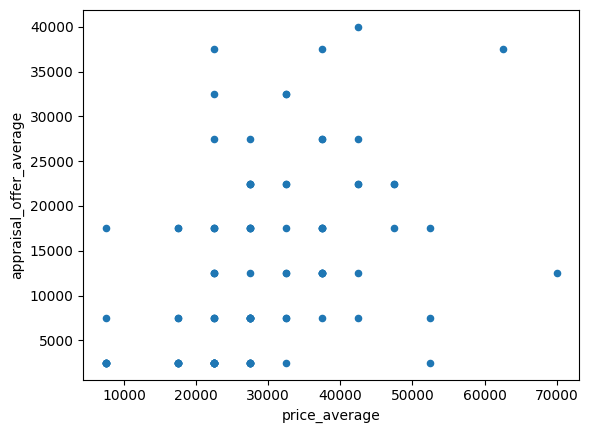

In [41]:
g = df_og5[["price_average", "appraisal_offer_average"]]
g.sample(n = 100).plot.scatter(x = "price_average", y = "appraisal_offer_average")

In [42]:
g.corr()

,price_average,appraisal_offer_average
price_average,1.000000,0.390499
appraisal_offer_average,0.390499,1.000000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='mileage_average', ylabel='mileage_appraisal_average'>

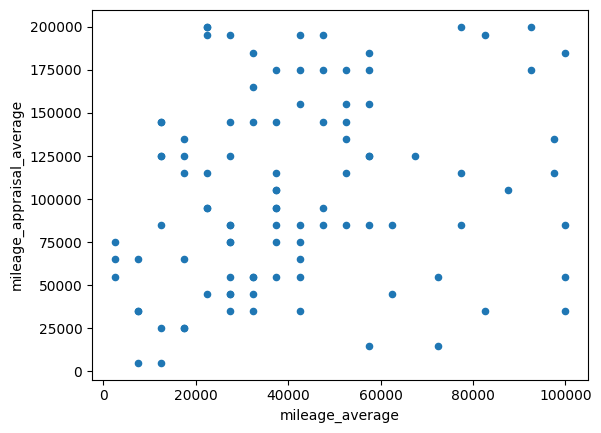

In [43]:
d = df_og5[["mileage_average", "mileage_appraisal_average"]]
d.sample(n = 100).plot.scatter(x = "mileage_average", y = "mileage_appraisal_average")

In [44]:
d.corr()

,mileage_average,mileage_appraisal_average
mileage_average,1.000000,0.166891
mileage_appraisal_average,0.166891,1.000000


In [ ]:
a = df_og5[["engine", "engine_appraisal"]]
a.sample(n = 100).plot.scatter(x = "engine", y = "engine_appraisal")

In [ ]:
a.corr()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='cylinders', ylabel='cylinders_appraisal'>

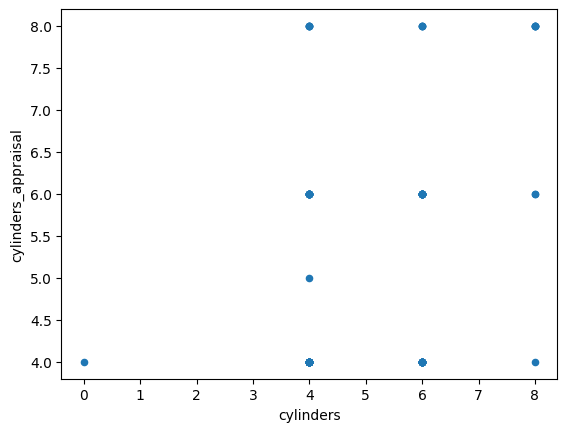

In [46]:
b = df_og5[["cylinders", "cylinders_appraisal"]]
b.sample(n = 100).plot.scatter(x = "cylinders", y = "cylinders_appraisal")

In [47]:
b.corr()

,cylinders,cylinders_appraisal
cylinders,1.000000,0.257158
cylinders_appraisal,0.257158,1.000000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='mpg_city', ylabel='mpg_city_appraisal'>

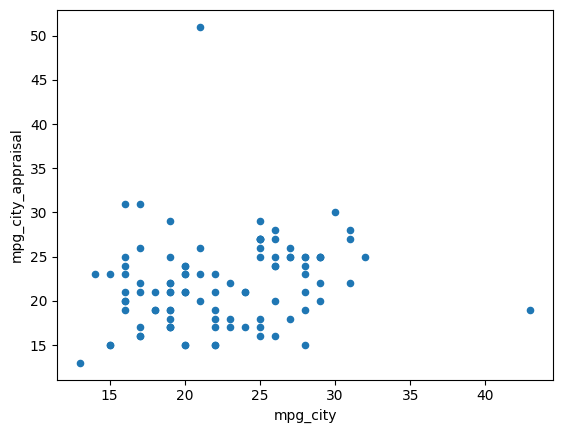

In [48]:
c = df_og5[["mpg_city", "mpg_city_appraisal"]]
c.sample(n = 100).plot.scatter(x = "mpg_city", y = "mpg_city_appraisal")

In [51]:
c.corr()

,mpg_city,mpg_city_appraisal
mpg_city,1.000000,0.224248
mpg_city_appraisal,0.224248,1.000000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='mpg_highway', ylabel='mpg_highway_appraisal'>

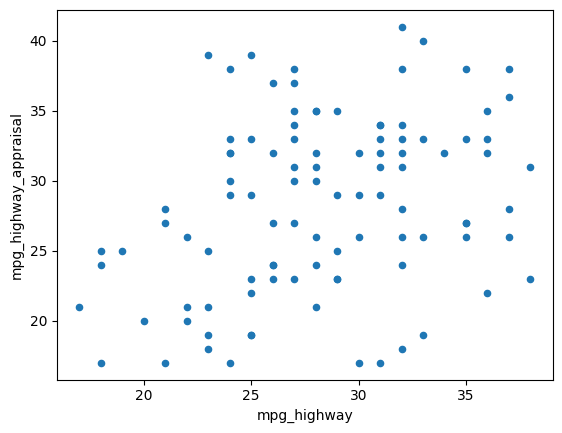

In [52]:
e = df_og5[["mpg_highway", "mpg_highway_appraisal"]]
e.sample(n = 100).plot.scatter(x = "mpg_highway", y = "mpg_highway_appraisal")

In [53]:
e.corr()

,mpg_highway,mpg_highway_appraisal
mpg_highway,1.000000,0.243465
mpg_highway_appraisal,0.243465,1.000000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='horsepower', ylabel='horsepower_appraisal'>

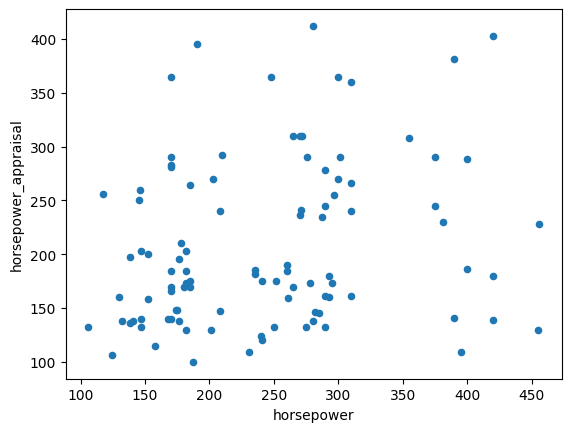

In [54]:
f = df_og5[["horsepower", "horsepower_appraisal"]]
f.sample(n = 100).plot.scatter(x = "horsepower", y = "horsepower_appraisal")

In [55]:
f.corr()

,horsepower,horsepower_appraisal
horsepower,1.00000,0.36239
horsepower_appraisal,0.36239,1.00000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='fuel_capacity', ylabel='fuel_capacity_appraisal'>

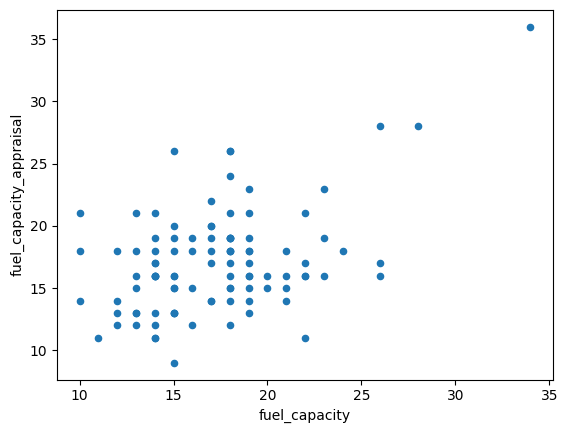

In [56]:
l = df_og5[["fuel_capacity", "fuel_capacity_appraisal"]]
l.sample(n = 100).plot.scatter(x = "fuel_capacity", y = "fuel_capacity_appraisal")

In [68]:
l.corr()
#note here: with all of the correlations, I tried them with a sample n= 100, and the coefficienct was never greater than 0.5

,fuel_capacity,fuel_capacity_appraisal
fuel_capacity,1.000000,0.150649
fuel_capacity_appraisal,0.150649,1.000000
